In [1]:
import xarray as xr
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import s3fs

Fetching the U-data

In [9]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-u.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
ds = xr.open_zarr(store=store, consolidated=True)
ds 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthu: 75, time_counter: 72, x: 1580, y: 1801)
Coordinates:
  * depthu                (depthu) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds         (time_counter, depthu, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sozotaux              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(72, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(72, 2), meta=np.ndarray>
    utau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    utau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    uwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vozocrtx              (time_counter, depthu, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean U grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:48 CEST
    title:             ocean U grid variables

In [7]:
u = ds.vozocrtx
u.shape

(72, 75, 1801, 1580)

Fetching V-data

In [10]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-v.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
ds = xr.open_zarr(store=store, consolidated=True)
ds 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthv: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depthv                (depthv) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthv_bounds         (time_counter, depthv, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sometauy              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    vomecrty              (time_counter, depthv, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    vtau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vtau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean V grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:49 CEST
    title:             ocean V grid variables

In [11]:
v = ds.vomecrty
v.shape

(73, 75, 1801, 1580)

Fetching the variance and the covariance 

In [12]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [13]:
dset = open_s3fs('PC-data')
dset

<xarray.Dataset>
Dimensions:        (depth: 75, x: 1580, y: 1801)
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered  object ...
    time_counter   object ...
    nav_lat        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    vel            (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    mbathy         (y, x) int16 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    vomecrty       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    vozocrtx       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>

In [20]:
# rewriting the name of the variables 
vvar = dset.vomecrty
uvar = dset.vozocrtx
covar = dset.vel

Choosing a point 

In [21]:
# choosing a point 
x = 1020 
y = 1540 

In [23]:
uvar = uvar[:,y,x]
vvar = vvar[:,y,x]
cov = covar[:,y,x]

In [29]:
uvar.shape

(75,)

The original data: 

In [26]:
v = v[:,:,y,x]
u = u[:,:,y,x]

In [27]:
v.shape

(73, 75)

In [30]:
A = xr.DataArray([[uvar,cov],[cov,vvar]], dims=["i", "j", "depth"])
A

<xarray.DataArray (i: 2, j: 2, depth: 75)>
array([[[ 7.6290686e-04,  7.4096303e-04,  7.1832229e-04,  6.9421867e-04,
          6.6086772e-04,  6.0906366e-04,  5.3916883e-04,  5.0896511e-04,
          4.8384810e-04,  4.6743653e-04,  3.9377520e-04,  3.0819737e-04,
          1.5554276e-04,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.8138307e-05, -2.9813506e-05, -2.8374703e-05, -2.6684203e-05,
...
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 4.1813159e-04,  3.9604475e-04,  3.7641838e-04,  3.5317719e-04,
          3.2739513e-04,  2.9279786e-04,  2.3922973e-04,  1.8037228e-04,
          1.3437182e-04,  1.0382041e-04,  8.5853935e-05,  7.8796649e-05,
          9.9078439e-05,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: i, j, depth

In [31]:
#eigenvectors and eigenvalues
value_list = np.zeros((75,2))
vector_list = np.zeros((75,2,2))

for i in range(len(A.depth)):
    values, vectors = np.linalg.eig(A[:,:,i])
    print('vectors:  ', vectors)
    print('values:  ',values)
    value_list[i] = values
    vector_list[i] = vectors               

print(vector_list.shape)
print(value_list.shape)

vectors:   [[ 0.9967294   0.08081181]
 [-0.08081181  0.9967294 ]]
values:   [0.00076519 0.00041585]
vectors:   [[ 0.9963394   0.08548603]
 [-0.08548603  0.9963394 ]]
values:   [0.00074352 0.00039349]
vectors:   [[ 0.9966202   0.08214785]
 [-0.08214785  0.9966202 ]]
values:   [0.00072066 0.00037408]
vectors:   [[ 0.99698955  0.07753593]
 [-0.07753593  0.99698955]]
values:   [0.00069629 0.0003511 ]
vectors:   [[ 0.99718744  0.07494812]
 [-0.07494812  0.99718744]]
values:   [0.00066276 0.0003255 ]
vectors:   [[ 0.9981526   0.06075697]
 [-0.06075697  0.9981526 ]]
values:   [0.00061024 0.00029162]
vectors:   [[ 0.99965507  0.02626362]
 [-0.02626362  0.99965507]]
values:   [0.00053938 0.00023902]
vectors:   [[ 0.99958074 -0.02895398]
 [ 0.02895398  0.99958074]]
values:   [0.00050924 0.0001801 ]
vectors:   [[ 0.9999954   0.00302875]
 [-0.00302875  0.9999954 ]]
values:   [0.00048385 0.00013437]
vectors:   [[ 0.9996997  -0.02450432]
 [ 0.02450432  0.9996997 ]]
values:   [0.00046766 0.0001036 ]


In [53]:
print(vector_list[0,:,:])
print(vector_list[0,:0,:])
print(value_list[1])
np.abs(value_list[1,0])

[[ 0.99672937  0.08081181]
 [-0.08081181  0.99672937]]
[]
[0.00074352 0.00039349]


0.0007435210281983018

In [46]:
#Feature vectors chosen from the eigenvectors I want to keep with the highest corresponding eigenvalue
fm = np.array([vector_list[0,:,0],vector_list[0,:,1]])
print(fm[:,0])
print(fm[:,1])
fm



[0.99672937 0.99633938]
[-0.08081181 -0.08548603]


array([[ 0.99672937, -0.08081181],
       [ 0.99633938, -0.08548603]])

In [44]:
fm[0,0]
value_list[1,0]

0.0007435210281983018

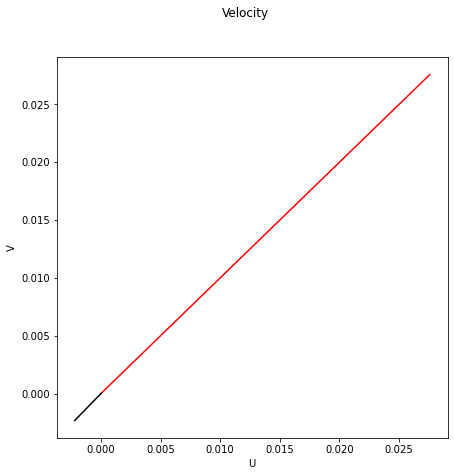

In [52]:
#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

#plt.scatter(v[:,0],u[:,0], s=6)


plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])],[0,fm[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])],[0,fm[1,1]*np.sqrt(value_list[1,0])],'k') #PC2